**Neural Networks**

**Student Name:** Prasanna Sundararajan Muthukumaran

**UTA ID:** 1001937587

In [1]:
# Importing all the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from keras.datasets import mnist
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Parent Class [X- Layer Input, Y- Layer Output]

class Layer:
    def __init__(self, input_neurons, output_neurons):
        self.X = input_neurons
        self.Y = output_neurons
        self.W = np.random.rand(input_neurons, output_neurons) - 0.5
        self.B = np.random.rand(1, output_neurons) - 0.5
        
    # Returns output of a layer given the input
    def forward_pass(self, X):
        raise NotImplementedError
        
    # Adjust the weight and bias parameters based on the output error
    def backward_pass(self, Y_error, learning_rate):
        raise NotImplementedError

In [3]:
# Linear Layer

class Linear_Layer(Layer):
    
    # Returns output of a layer given the input
    def forward_pass(self, X):
        self.X = X
        self.Y = np.dot(self.X, self.W) + self.B
        return self.Y
    
    # Find derivative of the error wrt the weight and bias parameters
    def backward_pass(self, Y_error, learning_rate):
        X_error = np.dot(Y_error, self.W.T)
        W_error = np.dot(self.X.T, Y_error)
        B_error = Y_error
        
        # Uppdating the weight and bias parameters
        self.W -= learning_rate * W_error
        self.B -= learning_rate * B_error
        return X_error

In [4]:
# Sigmoid Function

class Logistic_Sigmoid(Layer):
    def __init__(self):
        pass
    
    # Returns output of a layer given the input
    def forward_pass(self, X):
        self.X = X
        return 1. / (1. + np.exp(-self.X))

    def backward_pass(self, Y_error, learning_rate):
        return (1. / (1. + np.exp(-self.X))) * (1 - (1. / (1. + np.exp(-self.X)))) * Y_error

In [5]:
# Hyperbolic Tangent Function

class Hyperbolic_Tangent(Layer):
    def __init__(self):
        pass
    
    # Returns output of a layer given the input
    def forward_pass(self, X):
        self.X = X
        return (np.exp(self.X) - np.exp(-self.X)) / (np.exp(self.X) + np.exp(-self.X))

    def backward_pass(self, Y_error, learning_rate):
        tanh = (np.exp(self.X) - np.exp(-self.X)) / (np.exp(self.X) + np.exp(-self.X))
        return (1 - (tanh) ** 2) * Y_error

In [6]:
# Sequential Class (Contains list of all the layers)

class Sequential_Class(Layer):
    def __init__(self, loss = None, loss_grade = None):
        self.layers = []
        self.loss = loss
        self.loss_grade = loss_grade
    
    # Add new layers to the network
    def add_layer(self, newlayer):
        self.layers.append(newlayer)
        print('Neural Network Layers: ', self.layers)

    def predict(self, prediction_data):
        predictions = []
        for i in range(len(prediction_data)):
            target = prediction_data[i]
            for layer in self.layers:
                target = layer.forward_pass(target)
                predictions.append(target)
        return predictions
    
    def fit(self, x_train, y_train, epochs, learning_rate, modelname = ''):
        sample_dim = len(x_train)
        error_list = []
        epoch_list = []
        count = 0

        for i in range(epochs):
            error_val = 0
            for j in range(sample_dim):
                # forward propagation
                target = x_train[j]
                for layer in self.layers:
                    target = layer.forward_pass(target)
                error_val += self.loss(y_train[j], target)
                # backward propagation
                error = self.loss_grade(y_train[j], target)
                for layer in reversed(self.layers):
                    error = layer.backward_pass(error, learning_rate)

            # Calculating average error on all samples
            error_val = error_val/sample_dim
            error_list.append(error_val)
            epoch_list.append(i)
            print('epoch %d/%d   error=%f' % (i+1, epochs, error_val))
        
        fig = plt.figure(figsize=[7,10])
        ax = fig.add_subplot(1, 1, 1)
        ax.plot(epoch_list, error_list, color='r', linestyle="-")
        ax.set_title(modelname)
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Loss')

In [7]:
# Loss Function

# Mean Squared Error (MSE)
def mse(y_obs, y_pred):
    return np.mean((y_obs - y_pred) ** 2);

# Derivative of MSE
def mse_grade(y_obs, y_pred):
    return 2 * (y_pred - y_obs) / y_obs.size;

In [8]:
# XOR Testing

def XOR():
    x_train = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]]])
    y_train = np.array([[[0]], [[1]], [[1]], [[0]]])
    
    # Using Sigmoid Activation
    Model1 = Sequential_Class(mse, mse_grade)
    Model1.add_layer(Linear_Layer(2,2))
    Model1.add_layer(Logistic_Sigmoid())
    Model1.add_layer(Linear_Layer(2,1))
    Model1.add_layer(Logistic_Sigmoid())
    Model1.fit(x_train, y_train, epochs = 1000, learning_rate = 0.1, modelname='XOR Testing using Sigmoid Activation: ')
    Model1_sigmoid = Model1.predict(x_train)
    with open('XOR_solved_sigmoid.w', 'wb') as files:
        pickle.dump(Model1, files)
    print("\n\nXOR prediction using Sigmoid Activation: ", Model1_sigmoid)
    print("\n----------------------------------------------------------\n")
    
    # Using Hyperbolic Tangent Activation
    Model2 = Sequential_Class(mse, mse_grade)
    Model2.add_layer(Linear_Layer(2,2))
    Model2.add_layer(Hyperbolic_Tangent())
    Model2.add_layer(Linear_Layer(2,1))
    Model2.add_layer(Hyperbolic_Tangent())
    Model2.fit(x_train, y_train, epochs = 1000, learning_rate = 0.1, modelname='XOR Testing using Hyperbolic Tangent Activation: ')
    Model2_tanh = Model2.predict(x_train)
    with open('XOR_solved_tanh.w', 'wb') as files:
        pickle.dump(Model2, files)
    print("\n\nXOR prediction using Hyperbolic Tangent Activation: ", Model2_tanh)
    print("\n----------------------------------------------------------\n")

In [9]:
# Handwritten Digit Recognition

def Digit_Recognition():
    # Loading the MNIST dataset
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    
    # Reshape and normalize the input data
    x_train = x_train.reshape(x_train.shape[0], 1, 28*28)
    x_train = x_train.astype('float32')
    x_train = x_train/255
    y_train = np_utils.to_categorical(y_train)
    x_test = x_test.reshape(x_test.shape[0], 1, 28*28)
    x_test = x_test.astype('float32')
    x_test /= 255
    y_test = np_utils.to_categorical(y_test)
    
    # Splitting the dataset (10% for validation)
    x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.1, stratify = y_train)
    
  
    print("\n\n MNIST Model 1 \n\n")
    mnist_model1 = Sequential_Class(mse, mse_grade)
    mnist_model1.add_layer(Linear_Layer(28*28, 100))                
    mnist_model1.add_layer(Logistic_Sigmoid())
    mnist_model1.add_layer(Linear_Layer(100, 75))                   
    mnist_model1.add_layer(Logistic_Sigmoid())
    mnist_model1.add_layer(Linear_Layer(75, 10))                    
    mnist_model1.add_layer(Logistic_Sigmoid())
    mnist_model1.fit(x_train[:1000], y_train[:1000], epochs = 50, learning_rate = 0.1, modelname = 'MNIST Model 1: ')
    model1_validation = mnist_model1.predict(x_validation)
    
    
    print("\n\n MNIST Model 2 \n\n")
    mnist_model2 = Sequential_Class(mse, mse_grade)
    mnist_model2.add_layer(Linear_Layer(28*28, 100))                
    mnist_model2.add_layer(Hyperbolic_Tangent())
    mnist_model2.add_layer(Linear_Layer(100, 50))                   
    mnist_model2.add_layer(Hyperbolic_Tangent())
    mnist_model2.add_layer(Linear_Layer(50, 10))                    
    mnist_model2.add_layer(Hyperbolic_Tangent())
    mnist_model2.fit(x_train[:1000], y_train[:1000], epochs = 50, learning_rate = 0.1, modelname = 'MNIST Model 2: ')
    model2_validation = mnist_model2.predict(x_validation)
    

    print("\n\n MNIST Model 3 \n\n")
    mnist_model3 = Sequential_Class(mse, mse_grade)
    mnist_model3.add_layer(Linear_Layer(28*28, 250))                
    mnist_model3.add_layer(Hyperbolic_Tangent())
    mnist_model3.add_layer(Linear_Layer(250, 150))                   
    mnist_model3.add_layer(Logistic_Sigmoid())
    mnist_model3.add_layer(Linear_Layer(150, 50))                    
    mnist_model3.add_layer(Hyperbolic_Tangent())
    mnist_model3.add_layer(Linear_Layer(50, 25))                    
    mnist_model3.add_layer(Logistic_Sigmoid())
    mnist_model3.add_layer(Linear_Layer(25, 10))                    
    mnist_model3.add_layer(Hyperbolic_Tangent())
    mnist_model3.fit(x_train[:1000], y_train[:1000], epochs = 50, learning_rate = 0.1, modelname = 'MNIST Model 3: ')
    model3_validation = mnist_model3.predict(x_validation)

Performing XOR Testing


Neural Network Layers:  [<__main__.Linear_Layer object at 0x00000280357CA8B0>]
Neural Network Layers:  [<__main__.Linear_Layer object at 0x00000280357CA8B0>, <__main__.Logistic_Sigmoid object at 0x00000280357CA970>]
Neural Network Layers:  [<__main__.Linear_Layer object at 0x00000280357CA8B0>, <__main__.Logistic_Sigmoid object at 0x00000280357CA970>, <__main__.Linear_Layer object at 0x00000280357CA550>]
Neural Network Layers:  [<__main__.Linear_Layer object at 0x00000280357CA8B0>, <__main__.Logistic_Sigmoid object at 0x00000280357CA970>, <__main__.Linear_Layer object at 0x00000280357CA550>, <__main__.Logistic_Sigmoid object at 0x00000280357CA1F0>]
epoch 1/1000   error=0.255161
epoch 2/1000   error=0.255144
epoch 3/1000   error=0.255130
epoch 4/1000   error=0.255117
epoch 5/1000   error=0.255106
epoch 6/1000   error=0.255096
epoch 7/1000   error=0.255088
epoch 8/1000   error=0.255081
epoch 9/1000   error=0.255075
epoch 10/1000   error=0.255070
epoch 11/1000   er

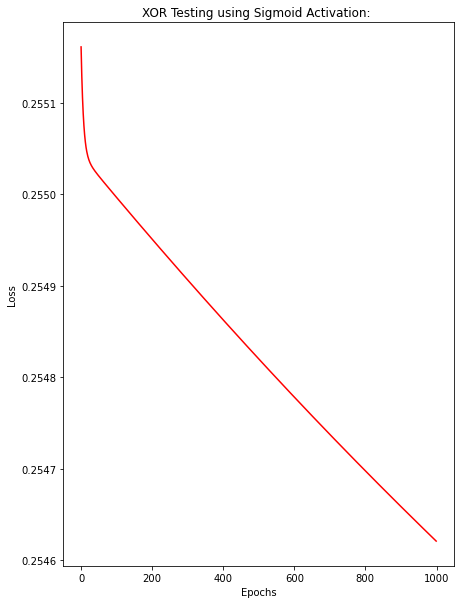

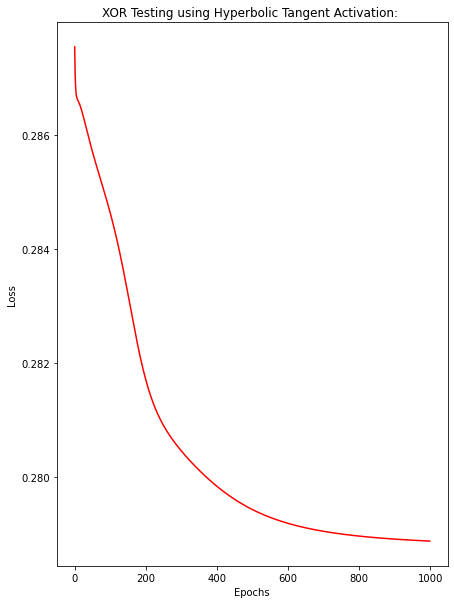

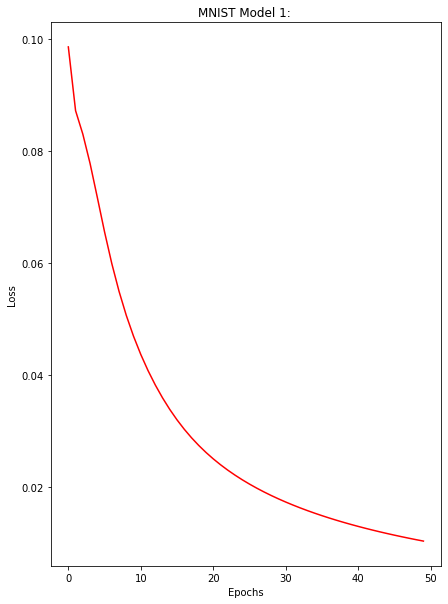

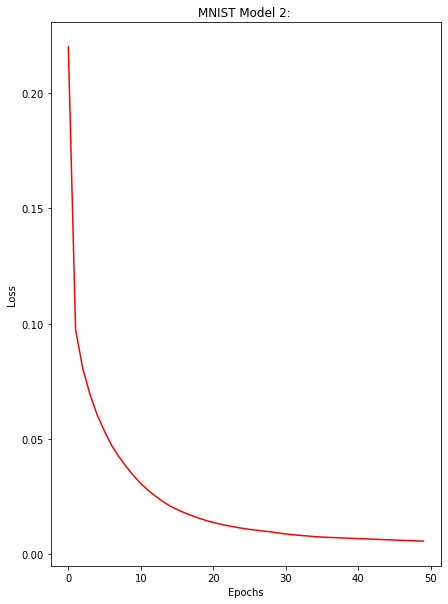

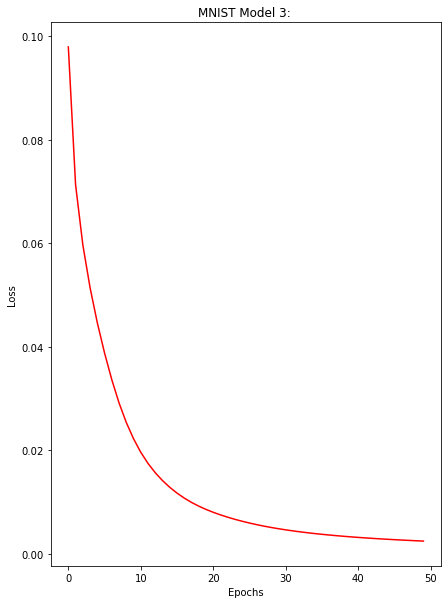

In [10]:
# Main Function

def main():
    print('Performing XOR Testing\n\n')
    XOR()
    print('Performing Handwritten Digit Recognition\n')
    Digit_Recognition()
    
if __name__ == '__main__':
    main()

**References**

[1] https://dillhoffaj.utasites.cloud/posts/neural_networks/

[2] https://github.com/ajdillhoff/CSE6363/blob/main/neural_networks/mlp.ipynb

[3] https://towardsdatascience.com/math-neural-network-from-scratch-in-python-d6da9f29ce65

[4] https://github.com/ajdillhoff/CSE6363/blob/main/neural_networks/neural_network.ipynb